In [68]:
# import libraries
import os
import pandas as pd
import numpy as np

# set display of floats to commas
pd.options.display.float_format = '{:,.0f}'.format

# num max rows
pd.set_option('display.max_rows', 40)

In [69]:
# setup directories
dirWork = os.getcwd()
dirData = os.path.join(dirWork, r'data')

print("Working Directory: " + dirWork)
print("Data Directory: "    + dirData)

Working Directory: e:\GitHub\Continuous-Count-Station-Data-Demo
Data Directory: e:\GitHub\Continuous-Count-Station-Data-Demo\data


In [70]:
# read in data
# REMEMBER TO UNZIP FILE IF NEWLY CLONED REPOSITORY
dfCCS = pd.read_csv(os.path.join(dirData,'CCSHourDir_2013to2019.csv'))
display(dfCCS)

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL
0,301,2013,1,1,1,0,N,358
1,301,2013,1,1,1,0,P,288
2,301,2013,1,1,1,1,N,435
3,301,2013,1,1,1,1,P,292
4,301,2013,1,1,1,2,N,277
...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494
9379251,716,2019,6,30,6,0,N,5032
9379252,716,2019,6,30,6,0,P,4707
9379253,716,2019,7,29,0,0,N,7037


In [71]:
dfCCS['DATE'] = pd.to_datetime(dict(year=dfCCS.YEAR, month=dfCCS.MONTH, day=dfCCS.DAY))
dfCCS

,STATION,YEAR,MONTH,DAY,DOW,HOUR,DIR,HOURVOL,DATE
0,301,2013,1,1,1,0,N,358,2013-01-01
1,301,2013,1,1,1,0,P,288,2013-01-01
2,301,2013,1,1,1,1,N,435,2013-01-01
3,301,2013,1,1,1,1,P,292,2013-01-01
4,301,2013,1,1,1,2,N,277,2013-01-01
...,...,...,...,...,...,...,...,...,...
9379250,716,2019,6,29,5,0,P,7494,2019-06-29
9379251,716,2019,6,30,6,0,N,5032,2019-06-30
9379252,716,2019,6,30,6,0,P,4707,2019-06-30
9379253,716,2019,7,29,0,0,N,7037,2019-07-29


In [72]:
# list stations
dfCCS['STATION'].unique()

array([301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314,
       315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 327, 329,
       332, 333, 335, 340, 341, 348, 349, 350, 351, 353, 354, 355, 362,
       363, 382, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 411,
       412, 414, 415, 416, 418, 420, 421, 424, 425, 427, 430, 431, 501,
       502, 503, 504, 506, 507, 508, 509, 510, 511, 512, 513, 601, 602,
       605, 606, 609, 611, 612, 613, 614, 615, 616, 617, 619, 620, 621,
       622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
       635, 636, 637, 638, 639, 641, 642, 643, 644, 645, 646, 647, 648,
       649, 650, 651, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662,
       663, 665, 667, 669, 670, 671, 672, 674, 702, 703, 704, 711, 712,
       713, 714, 715, 716], dtype=int64)

In [73]:
# for each station calculate daily volumes, num records reprsents number of hours x number of lanes x directions
dfCCS_DayVol = dfCCS.groupby(['STATION','YEAR','MONTH','DAY','DATE'],as_index=False).agg(DAYVOL=('HOURVOL','sum'),NUMREC=('HOURVOL','size'))
display(dfCCS_DayVol)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
0,301,2013,1,1,2013-01-01,40215,48
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
4,301,2013,1,5,2013-01-05,47536,48
...,...,...,...,...,...,...,...
267758,716,2019,6,27,2019-06-27,17194,2
267759,716,2019,6,28,2019-06-28,17602,2
267760,716,2019,6,29,2019-06-29,15212,2
267761,716,2019,6,30,2019-06-30,9739,2


In [90]:
#filterStations = [301,510] # [301,510]
filterStations = [301, 332, 612, 657, 711]
filterDaysOfWeek = [2,3,4] # (Monday=0,Sunday=6), [2,3,4] = Tuesday through Thursday

# filter data by station number and weekday 
dfCCS_DayVol_fltr = dfCCS_DayVol[(dfCCS_DayVol['STATION'].isin(filterStations             )) &
                                 (dfCCS_DayVol['DATE'   ].dt.weekday.isin(filterDaysOfWeek))].copy()
display(dfCCS_DayVol_fltr)

,STATION,YEAR,MONTH,DAY,DATE,DAYVOL,NUMREC
1,301,2013,1,2,2013-01-02,48604,48
2,301,2013,1,3,2013-01-03,48287,48
3,301,2013,1,4,2013-01-04,51901,48
8,301,2013,1,9,2013-01-09,47014,48
9,301,2013,1,10,2013-01-10,38743,48
...,...,...,...,...,...,...,...
261106,711,2019,10,2,2019-10-02,49163,2
261107,711,2019,10,3,2019-10-03,50309,2
261108,711,2019,10,4,2019-10-04,51015,2
261113,711,2019,10,9,2019-10-09,48412,2


In [91]:
# aggregate by station and month and calculate stats for each
dfMonthStats = dfCCS_DayVol_fltr.groupby(['STATION','YEAR','MONTH']).agg(AVGVOL =('DAYVOL','mean' ),
                                                                         MINVOL =('DAYVOL','min'  ),
                                                                         MAXVOL =('DAYVOL','max'  ),
                                                                         STDEV  =('DAYVOL','std'  ),
                                                                         NUMDAYS=('DAYVOL','count'))

display(dfMonthStats)

AVGVOL  MINVOL  MAXVOL  STDEV  NUMDAYS
STATION YEAR MONTH                                        
301     2013 1      47,661   23202   58055  8,808       14
             2      49,095   44393   55239  3,069       12
             3      49,513   46132   54365  2,692       13
             4      45,738   41445   49977  2,854       12
             5      46,098   42537   49663  2,331       15
...                    ...     ...     ...    ...      ...
711     2019 6      34,396   32801   35672    864       12
             7      49,613   43477   52105  2,513       10
             8      48,840   42925   51078  3,127        6
             9      49,365   43730   51557  3,191        5
             10     49,643   48412   51015  1,022        5

[338 rows x 5 columns]

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

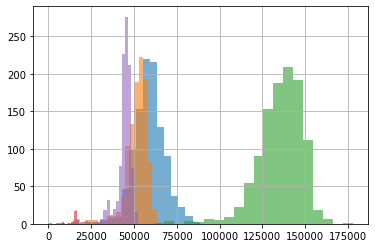

In [95]:
# make histogram of volumes by station
# alpha sets opacity, bins sets number of bin
for s in filterStations:
    display(dfCCS_DayVol_fltr[dfCCS_DayVol_fltr['STATION']==s]['DAYVOL'].hist(bins=20,alpha=0.6))

In [96]:
#for checks and understanding
#calculate number of days with data per station per month

# calculate number of hours of data per day
dfCCS_days       = dfCCS     .groupby(['STATION','YEAR','MONTH','DAY'], as_index=False).agg(NUM_HOURS=('HOURVOL'  ,'size'))
dfCCS_days_month = dfCCS_days.groupby(['STATION','YEAR','MONTH'      ], as_index=False).agg(NUM_DAYS =('NUM_HOURS','size'))

dfCCS_days_month_pivot = dfCCS_days_month.pivot_table(index=['STATION'], columns=('YEAR','MONTH'), values='NUM_DAYS').reset_index()
dfCCS_days_month_pivot = dfCCS_days_month_pivot.fillna(0)

# display dataframe
display(dfCCS_days_month_pivot)

#export
#df_3.to_csv(os.path.join(dirIntermediate, r'StationMonthDays.csv'),index=False)

YEAR  STATION 2013                                  2014                       \
MONTH            1  2  3  4  5  6  7  8  9 10 11 12    1  2  3  4  5  6  7  8   
0         301   31 28 30 30 31 28 28 31 30 22 30 31   31 28 30 30 31 29 29 29   
1         302   31 28 30 30 31 30 31 29 30 31 30 31   31 28 30 30 31 30 30 31   
2         303   23 27 30 30 31 30 31 31 30 31 30 31   31 28 30 30 26  0 23 31   
3         304   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 29 30 31   
4         305   28 28 30 30 28 30 25 31 30 31 30 31   31 22 30 30 31 30 24 31   
..        ...  ... .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
142       712    0  0  0  0  0  0  0  0  0  0  0  0    0 23 30 30 31 30 30 31   
143       713    0  0  0  0  0  0  0  0  0  0  0  0    0 23 30 30 31 30 30 31   
144       714    0  0  0  0  0  0  0  0  0  0  0  0    0 23 30 30 31 30 30 31   
145       715    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0  0  0  0  0   
146       716    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0  0  0  0  0   

YEAR              2015                                  2016                 \
MONTH  9 10 11 12    1  2  3  4  5  6  7  8  9 10 11 12    1  2  3  4  5  6   
0     28 31 28 31   31 28 28 30 31 30 31 31 30 31 27 31   31 29 30 30 31 29   
1     30 31 28 31   31 28 30 29 31 30 30 31 30 30 29 23   31 17 30  8  0  0   
2     30 31 25 31   31 28 30 30 31 30 31 31 30 31 29 29   31 29 30 30 31 30   
3     30 31 29 31   31 28 30 28 31 30 31 31 30 31 29 31   31 29 30 30 31 30   
4     30 31 29 31   31 28 30 29 31 30 31 31 30 31 29 31   31 29 30 29 31 30   
..    .. .. .. ..  ... .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. ..   
142   30 31 29 31   30 28 30 28 31 30 31 31 30 26 29 31   31 29 20 30 31 30   
143   30 31 29 31   31 28 30 30 31 30 31 31 30 31 29 31   31 29 30 30 31 30   
144   30 31 29 31   31 28 30 30 31 30 31 31 30 31 29 31   31 29 30 30 31 30   
145    0  0  0  0    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0  0  0   
146    0  0  0  0    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0  0  0   

YEAR                    2017                                  2018           \
MONTH  7  8  9 10 11 12    1  2  3  4  5  6  7  8  9 10 11 12    1  2  3  4   
0     31 31 30 31 30 30   30 28 30 29 29 30 30 31 30 31 25 31   31 28 29 29   
1     26 31 20 28 30 30   22 21 29 30 30 30 31 31 30 31 29 31   31 28 31 27   
2     31 31 30 31 30 30   11 28 30 30 31 30 31 31 30 31 30 31   30 24 30 30   
3     31 31 30 31 30 30   30 28 30 29 31 30 30 30 30 31 25 31   31 28 30 30   
4     31 31 30 31 30 30   30 28 22 29 31 27 26 31 30 31 30 31   31 28 26 30   
..    .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. .. ..  ... .. .. ..   
142   31 31 30 31 30 30   31 28 30 16 31 30 31 31 30 31 23 31   31 28 30 30   
143   31 31 30 31 30 30   30 28 30 30 31 30 31 24 17 30 18 31   31 28 31 30   
144   31 31 30 31 30 30   28 28 30 30 31 30 31 31 30 31 29 31   31 28 31 30   
145    0  0  0  0  0  0    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0   
146    0  0  0  0  0  0    0  0  0  0  0  0  0  0  0  0  0  0    0  0  0  0   

YEAR                          2019                                   
MONTH  5  6  7  8  9 10 11 12    1  2  3  4  5  6  7  8  9 10 11 12  
0     31 24 31 31 30 31 26 26   31 28 31 29 29 30  0  7 28 31 30 31  
1     31 30 31 31 30 31 30 31   30 28 30 30 29 18 31 27 29 31 30 13  
2     31 30 31 31 30 31 30 29   30 28 30 30 31 30 31 31 29 31 30 28  
3     31 24 31 27 28 31 30 31   31 28 30 30 21 30 31 31 29 31 30 31  
4     31 30 31 31 30 31 29 31   31 28 30 30 31 30 31 27 29 31 30 31  
..    .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. .. ..  
142   31 30 31 31 30 31 30 31   31 28 30 30 21 30 29 20 29 31 30 24  
143   31 30 31 31 30 31 30 31   31 28 30 30 21 30 31 30 26 31 30 29  
144   31 30 31 31 30 31 30 31   31 28 30 30 21 30 31 31 29 31 30 31  
145    0  0  0  0  0  0  0  0   12 28 31 30 29 30  2  0  0  0  0  0  
146    0  0  0  0  0  0  0 13   31 23 31 30 26 30 

In [98]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(dfCCS_days_month_pivot)
pd.set_option('display.max_rows', 40)

YEAR  STATION 2013                                  2014                       \
MONTH            1  2  3  4  5  6  7  8  9 10 11 12    1  2  3  4  5  6  7  8   
0         301   31 28 30 30 31 28 28 31 30 22 30 31   31 28 30 30 31 29 29 29   
1         302   31 28 30 30 31 30 31 29 30 31 30 31   31 28 30 30 31 30 30 31   
2         303   23 27 30 30 31 30 31 31 30 31 30 31   31 28 30 30 26  0 23 31   
3         304   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 29 30 31   
4         305   28 28 30 30 28 30 25 31 30 31 30 31   31 22 30 30 31 30 24 31   
5         306   30 25 30 30 31 30 31 31 30 31 30 31   31 28 30 30 30 30 30 31   
6         307   31 28 30 30 31 30 31 31 30 31 30 27   31 20 30 30 31 28 31 31   
7         308   31 28 30 30 31 30 30 31 30 31 29 28   31 28 30 30 31 30 31 31   
8         309   25 28 30 30 31 30 30 31 30 31 30 27   31 28 29 30 31 28 30 31   
9         310   31 27 30 30 30 22 31 31 30 31 30 31   31 28 29 30 31 29 31 31   
10        312   23 28 28 30 18 30 31 31 30 31 30 31   30 28 29 30 31 29 29 31   
11        313   31 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 30 25 31   
12        314   30 28 30 30 31 30 31 30 30 31 11 31   31 28 30 30 31 30 29 31   
13        315   30 28 29 30 31 29 31 31 30 31 30 31   31 28 30 30 31 29 31 31   
14        316   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29 31 30 31 31   
15        317   31 28 30 30 31 30 31 31 30 31 30 29   31 28 30 30 31 30 31 31   
16        318   27 28 30 30 31 30 31 31 30 31 30 26   31 28 29 30 31 28 31 31   
17        319   31 28 29 30 31 30 31 31 30 31 30 31   31 28 30 30 31 12 31 31   
18        320   24 28 30 30 22 18 27 30 26 29 30 28   31 25 30 30 31 24 30 29   
19        321   31 28 30 30 31 30 31 31 30 31 30 31   31 28 29 30 31 30 30 31   
20        322   31 28 30 30 31 30 27 30 30 25 30 31   31 28 30 30 31 30 31 31   
21        323   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31   
22        324   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 31 31   
23        325   31 28 30 30 30 30 31 31 30 31 30 31   31 28 30 27 11 13 28 17   
24        327   31 28 29 30 31 30 31 31 30 31 30 31   30 28 30 30 31 30 31 30   
25        329   22 28 30 30 31 30 31 31 30 31 30 25   29 24 29 30 31 24 31 31   
26        332   31 25 30 30 22 30 31 31 30 15 23 27   19 28 26 28 25 28 23 31   
27        333   31 28 30 30 31 30 31 31 29 31 30 30   30 28 30 30 31 30 31 31   
28        335   31 28 30 30 31 30 29 28 30 27 30 29   30 28 30 30 31 29 29 31   
29        340   31 26 28 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30 30 31   
30        341   31 28 30 30 31 29 30 31 30 31 30 31   31 28 29 30 30 17 29 30   
31        348   23 28 30 30 31 30 31 31 30 31 28 25   31 28 30 30 31 29 30 31   
32        349   31 28 30 30 30 30 31 31 30 31 29 31   31 28 30 30 31 30 30 31   
33        350   26 28 30 30 31 30 31 31 30 31 30 29   31 28 29 30 31 29 31 31   
34        351   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 29  0 27 31 31   
35        353   31 28 30 30 30 30 31 31 30 31 30 30   31 28 29 30 31 29 23 31   
36        354   31 28 30 30 31 30 31 31 29 31 30 30   31 28 30 30 31 29 31 31   
37        355   31 28 30 30 31 30 31 31 30 31 30 31   31 18 30 30 31 30 31 31   
38        362   31 28 30 30 31 30 31 31 30 31 30 31   31 28 30 30 31 30  0  0   
39        363   31 28 30 30 31 30 31 27 30 31 30 31   31 28 29 30 31 30 31 31   
40        382   31 28 30 30 31 30 31 31 26 31 30 31   31 24 26 17 31 30 31 31   
41        400   31 26 29 30 30 30 31 31 28 29 29 31   31 28 27 27 31 29 30 31   
42        401   31 28 30 30 31 30 31 31 30 28 28 25   12 27 29 13 31 30 30 31   
43        402   31 28 30 30 31 30 31 31 29 30 26 27   29 24 29 30 31 30 30 31   
44        403   31 27 30 27 31 30 31 31 26 31 29 30   31 28 28 28 22 20 25 31   
45        404   31 28 30 30 31 30 31 27 27 31 30 31   31 28 31 30 31 30 31 31   
46        405   31 28 30 30 31 30 31 31 30 31 30 31   31 23 21 29 17  0 21 31   
47        406   31 28 30 30 31 